<a href="https://colab.research.google.com/github/RazerRaymond/Pricing-Simulations/blob/main/stratified_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import scipy.stats as st
import scipy as sp
from time import time

In [ ]:
def BMS_d1(S, K, r, q, sigma, tau):
    ''' Computes d1 for the Black Merton Scholes formula '''
    d1 = 1.0*(np.log(1.0 * S/K) + (r - q + sigma**2/2) * tau) / (sigma * 
np.sqrt(tau))
    return d1
def BMS_d2(S, K, r, q, sigma, tau):
    ''' Computes d2 for the Black Merton Scholes formula '''
    d2 = 1.0*(np.log(1.0 * S/K) + (r - q - sigma**2/2) * tau) / (sigma * 
np.sqrt(tau))
    return d2
def BMS_price(type_option, S, K, r, q, sigma, T, t=0):
    ''' Computes the Black Merton Scholes price for a 'call' or 'put' option '''
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    d2 = BMS_d2(S, K, r, q, sigma, tau)
    if type_option == 'call':
        price = S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    elif type_option == 'put':
        price = K * np.exp(-r * tau) * norm.cdf(-d2) - S * np.exp(-q * tau) * norm.cdf(-d1) 
    return price

In [ ]:
# Data for Stock
s0 = 1260
K = 1100
sig = 0.35
T = 0.25
r = 0.0025
q = 0.01
put = BMS_price('put', s0, K, r, q, sig, T)

In [ ]:
# Use Array to store each stratum statistics
stra_a_p = []
stra_b_p = []
stra_c_p = []
stra_d_p = []
stra_a_e = []
stra_b_e = []
stra_c_e = []
stra_d_e = []

## Stratum (a)

### n = 20000, Stratum (a)

In [ ]:
np.random.seed(147985234)
n_sims = 20000

In [ ]:
delta = np.array([-np.inf, -6, 0, 3, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

10
20000
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [   10 20000    10    10]
p_hat = 26.20396
std error = 0.27324


In [ ]:
stra_a_p.append(p_hat3)
stra_a_e.append(std_err3)

### n = 50000, Stratum (a)

In [ ]:
np.random.seed(147985234)
n_sims = 50000

In [ ]:
delta = np.array([-np.inf, -6, 0, 3, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

10
50000
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [   10 50000    10    10]
p_hat = 26.21404
std error = 0.17341


In [ ]:
stra_a_p.append(p_hat3)
stra_a_e.append(std_err3)

### n = 100000, Stratum (a)

In [ ]:
np.random.seed(147985234)
n_sims = 100000

In [ ]:
delta = np.array([-np.inf, -6, 0, 3, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

10
100000
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [    10 100000     10     10]
p_hat = 26.18078
std error = 0.12233


In [ ]:
stra_a_p.append(p_hat3)
stra_a_e.append(std_err3)

## Stratum (b)

### n = 20000, Stratum (b)

In [ ]:
np.random.seed(147985234)
n_sims = 20000    

In [ ]:
delta = np.array([-np.inf, 1, 2, 6, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

20000
10
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [20000    10    10    10]
p_hat = 26.03551
std error = 0.38405


In [ ]:
stra_b_p.append(p_hat3)
stra_b_e.append(std_err3)

### n = 50000, Stratum (b)

In [ ]:
np.random.seed(147985234)
n_sims = 50000    

In [ ]:
delta = np.array([-np.inf, 1, 2, 6, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

50000
10
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [50000    10    10    10]
p_hat = 26.06903
std error = 0.24464


In [ ]:
stra_b_p.append(p_hat3)
stra_b_e.append(std_err3)

### n = 100000, Stratum (b)

In [ ]:
np.random.seed(147985234)
n_sims = 100000

In [ ]:
delta = np.array([-np.inf, 1, 2, 6, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

100000
10
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [100000     10     10     10]
p_hat = 25.99014
std error = 0.17238


In [ ]:
stra_b_p.append(p_hat3)
stra_b_e.append(std_err3)

## Stratum (c)

### n = 20000, Stratum (c)

In [ ]:
np.random.seed(147985234)
n_sims = 20000

In [ ]:
delta = np.array([-np.inf, -1, 3, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

10459
9542
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [10459  9542    10]
p_hat = 26.14954
std error = 0.14154


In [ ]:
stra_c_p.append(p_hat3)
stra_c_e.append(std_err3)

### n = 50000, Stratum (c)

In [ ]:
np.random.seed(147985234)
n_sims = 50000

In [ ]:
delta = np.array([-np.inf, -1, 3, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

26147
23854
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [26147 23854    10]
p_hat = 26.15956
std error = 0.09001


In [ ]:
stra_c_p.append(p_hat3)
stra_c_e.append(std_err3)

### n = 100000, Stratum (c)

In [ ]:
np.random.seed(147985234)
n_sims = 100000

In [ ]:
delta = np.array([-np.inf, -1, 3, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

52293
47708
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [52293 47708    10]
p_hat = 26.17764
std error = 0.06336


In [ ]:
stra_c_p.append(p_hat3)
stra_c_e.append(std_err3)

## Stratum (d)

### n = 20000, Stratum (d)

In [ ]:
np.random.seed(147985234)
n_sims = 20000

In [ ]:
delta = np.array([-np.inf, 0, 1, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

20000
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [20000    10    10]
p_hat = 26.22553
std error = 0.27261


In [ ]:
stra_d_p.append(p_hat3)
stra_d_e.append(std_err3)

### n = 50000, Stratum (d)

In [ ]:
np.random.seed(147985234)
n_sims = 50000

In [ ]:
delta = np.array([-np.inf, 0, 1, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

50000
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [50000    10    10]
p_hat = 26.20231
std error = 0.17330


In [ ]:
stra_d_p.append(p_hat3)
stra_d_e.append(std_err3)

### n = 100000, Stratum (d)

In [ ]:
np.random.seed(147985234)
n_sims = 100000

In [ ]:
delta = np.array([-np.inf, 0, 1, np.inf])
cdf_delta = sp.stats.norm.cdf(delta)
p = np.diff(cdf_delta)
m = len(p)

In [ ]:
# pilot program to find ni optimal
sig_i = np.zeros(m)
for i in range(m):
    n_pilot = 500
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(n_pilot)
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K - s1, 0)
    sig_i[i] = np.std(payoff, ddof=1)
    
# num of samples is proportional to p * sigma
tmp = sig_i * p
ni_opt = np.ceil(n_sims * tmp / np.sum(tmp)).astype(int)
# we simulate at least 10 samples in each stratum
ni_opt = np.maximum(ni_opt, 10)

p_hat3 = 0.
var_hat3 = 0.

for i in range(m):
    u = cdf_delta[i] + (cdf_delta[i + 1] - cdf_delta[i]) * np.random.rand(ni_opt[i])
    print(ni_opt[i])
    z = sp.stats.norm.ppf(u)
    s1 = s0 * np.exp((r - q - sig*sig/2)*T + sig*np.sqrt(T)*z)
    payoff = np.exp(-r*T)*np.maximum(K- s1, 0)
    theta_i = np.mean(payoff)
    var_i = np.var(payoff, ddof=1)
    p_hat3 += theta_i * p[i]
    var_hat3 += var_i * p[i] * p[i] / ni_opt[i]
    std_err3 = np.sqrt(var_hat3)

100000
10
10


In [ ]:
print('Stratified sampling (optimal)')
print('Exact solution = %3.4f' % put)
print('Number of samples per stratum: ' + str(ni_opt))
print('p_hat = %3.5f' % p_hat3)
print('std error = %3.5f' % std_err3)

Stratified sampling (optimal)
Exact solution = 26.2173
Number of samples per stratum: [100000     10     10]
p_hat = 26.18936
std error = 0.12231


In [ ]:
stra_d_p.append(p_hat3)
stra_d_e.append(std_err3)

## Conclusion

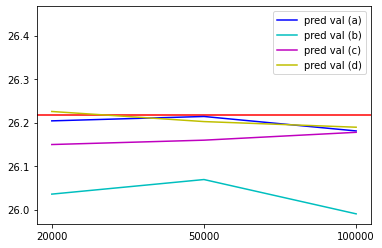

In [ ]:
x = [20000, 50000, 100000]
default_x_ticks = range(len(x))
plt.axhline(y=put, color='r', linestyle='-')
plt.plot(default_x_ticks, stra_a_p, color = 'b', label="pred val (a)")
plt.plot(default_x_ticks, stra_b_p, color = 'c', label="pred val (b)")
plt.plot(default_x_ticks, stra_c_p, color = 'm', label="pred val (c)")
plt.plot(default_x_ticks, stra_d_p, color = 'y', label="pred val (d)")
plt.xticks(default_x_ticks, x)
ax = plt.gca()
ax.set_ylim([put-0.25, put+0.25])
plt.legend(loc="upper right")
plt.show()

In [ ]:
stra_a_e

[0.27324211247585467, 0.1734109755643523, 0.12233176203322957]

In [ ]:
stra_d_e

[0.27260852497753224, 0.17329803435966049, 0.12230993178671042]

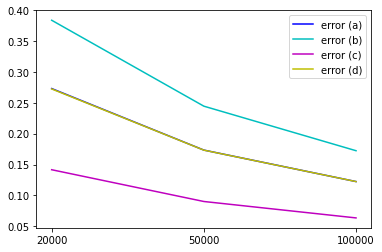

In [ ]:
plt.plot(default_x_ticks, stra_a_e, color = 'b', label="error (a)")
plt.plot(default_x_ticks, stra_b_e, color = 'c', label="error (b)")
plt.plot(default_x_ticks, stra_c_e, color = 'm', label="error (c)")
plt.plot(default_x_ticks, stra_d_e, color = 'y', label="error (d)")
plt.xticks(default_x_ticks, x)
plt.legend(loc="upper right")
plt.show()

From the plot, we can certainly conclude that the choice of stratum will influence the accuracy of the simulation. So it is important to test before deciding which Stratum to use.

with certain results (Stratum b) performed inferior in both bias and variance.

Notice that Stratum a and Stratum d had an extremely close error since their optimized n* are the same.

Also noticed that greater number of simulation will decrease the variance.

Given the four stratum above, Stratum d seems a reasonable choice to use.